# Sort candidate pulse sequences

From the job output, keep only the lines that contain the text "candidate pulse sequence" (can do `cat rl_pulse... | grep "candidate pulse sequence"`) or use regex to delete all lines that don't contain candidate sequences via `^((?!candidate pulse sequence).)*$`.

In [1]:
import sys
import os
import re
import pandas as pd

In [15]:
path = '../../data/2021-02/20210219-082529/'

In [17]:
candidates = []
with open(os.path.join(path, 'candidates.txt')) as file:
    for line in file:
        candidates.append(line)

In [19]:
c2 = []
for c in candidates:
    try:
        m = re.search(r'(.*?) candidate pulse sequence from \d+ \((.*?), array\((.*?)\), (.*?)\)\n', c)
        c2.append({
            'timestamp': m.group(1),
            'sequence': m.group(2),
            'last_pulse': m.group(3),
            'value': float(m.group(4))
        })
    except Exception as e:
        print('exception caught')
        # print(c)

In [20]:
len(c2)

340393

In [21]:
df = pd.DataFrame(c2)

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

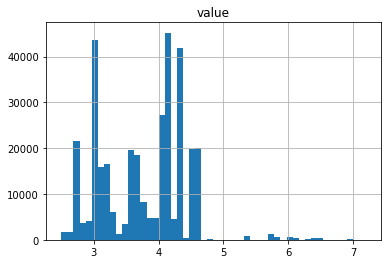

In [22]:
df.hist('value', bins=50)

In [23]:
df.sort_values('value', ascending=False, inplace=True)
# df

In [24]:
df.head()

,timestamp,sequence,last_pulse,value
314395,2021-02-20 03:03:27.145425,"[4, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0]","[0., 0., 1., 0., 0.]",7.195067
335050,2021-02-20 04:08:12.187636,"[4, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0]","[0., 0., 1., 0., 0.]",7.195067
233023,2021-02-19 22:47:36.960816,"[4, 0, 4, 1, 0, 1, 4, 0, 4, 1, 0]","[0., 1., 0., 0., 0.]",7.195067
332069,2021-02-20 03:58:52.631478,"[4, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0]","[0., 0., 1., 0., 0.]",7.195067
234429,2021-02-19 22:52:01.086824,"[4, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0]","[0., 0., 1., 0., 0.]",7.195067


In [25]:
df.to_csv(os.path.join(path, 'candidates_sorted.csv'))

## Set up spin system

In [ ]:
# TODO fill in

## Check candidates from CSV file

In [254]:
# df = pd.read_csv('../../data/2021-02/20210219-082529/candidates_sorted.csv')

In [255]:
df['sequence'] = df['sequence'].apply(lambda x: [int(i) for i in x[1:-1].split(',')])

In [256]:
df['last_pulse'] = df['last_pulse'].apply(lambda x: [float(i) for i in x[1:-1].split(',')])

In [257]:
df['last_pulse'] = df['last_pulse'].apply(lambda x: np.argwhere(x)[0][0])

In [258]:
df['full_sequence'] = df['sequence'] + df['last_pulse'].apply(lambda x: [x])

In [259]:
unique_sequences = df['full_sequence'].map(lambda x: ','.join([str(i) for i in x])).unique()

In [260]:
unique_sequences = [[int(j) for j in i.split(',')] for i in unique_sequences]

In [264]:
N_seq = 250
seqs = []
fidelities = np.zeros(N_seq)
for i in range(N_seq):
    if i % 10 == 0:
        print(i)
    candidate = unique_sequences[i]
    seqs.append(candidate)
    f = ps.get_mean_fidelity(candidate, Utarget, pulses_ensemble)
    fidelities[i] = f
    # print(i, f)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240


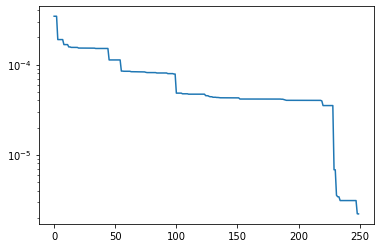

In [276]:
plt.plot(1 - fidelities)
plt.yscale('log')

In [272]:
fidelities.sort()

In [267]:
np.argmin(1 - fidelities), (1 - fidelities).min(), -np.log10((1 - fidelities).min())

(69, 2.198749538995237e-06, 5.657824238591604)

In [277]:
seqs[69]

[3, 1, 4, 4, 2, 4, 1, 4, 4, 2, 3, 3]

In [269]:
df['full_sequence']

0         [4, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0, 2]
1         [4, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0, 2]
2         [4, 0, 4, 1, 0, 1, 4, 0, 4, 1, 0, 1]
3         [4, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0, 2]
4         [4, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0, 2]
                          ...                 
340388    [4, 0, 4, 4, 1, 0, 3, 3, 3, 2, 4, 1]
340389    [2, 2, 2, 3, 2, 3, 1, 3, 3, 1, 2, 3]
340390    [4, 2, 4, 1, 4, 4, 0, 4, 2, 2, 2, 0]
340391    [4, 2, 2, 0, 2, 3, 3, 3, 0, 2, 3, 2]
340392    [2, 2, 4, 2, 3, 2, 0, 3, 3, 3, 2, 0]
Name: full_sequence, Length: 340393, dtype: object

In [270]:
print(df['full_sequence'][23])

[4, 0, 4, 2, 0, 2, 4, 0, 4, 2, 0, 2]


In [264]:
names = [
    r'\tau_{\pi/2}, \tau',
    r'X, \tau',
    r'-X, \tau',
    r'Y, \tau',
    r'-Y, \tau',
]

In [268]:
sequence_string = [names[i] for i in df['full_sequence'][23]]

print('$', ', '.join(sequence_string[:12]), '$')
print('$', ', '.join(sequence_string[12:24]), '$')
print('$', ', '.join(sequence_string[24:36]), '$')
print('$', ', '.join(sequence_string[36:48]), '$')

$ -X, \tau, Y, \tau, Y, \tau, Y, \tau, Y, \tau, -X, \tau, Y, \tau, -X, \tau, -Y, \tau, -X, \tau, -Y, \tau, X, \tau $
$ -X, \tau, Y, \tau, Y, \tau, Y, \tau, \tau_{\pi/2}, \tau, Y, \tau, \tau_{\pi/2}, \tau, -X, \tau, Y, \tau, -X, \tau, -X, \tau, -X, \tau $
$ Y, \tau, -X, \tau, \tau_{\pi/2}, \tau, -Y, \tau, -X, \tau, -X, \tau, -X, \tau, \tau_{\pi/2}, \tau, -Y, \tau, -Y, \tau, Y, \tau, X, \tau $
$ Y, \tau, -Y, \tau, -Y, \tau, \tau_{\pi/2}, \tau, \tau_{\pi/2}, \tau, \tau_{\pi/2}, \tau, -X, \tau, -X, \tau, -X, \tau, \tau_{\pi/2}, \tau, Y, \tau, -X, \tau $


Pulse sequence 23:

$ -X, \tau, Y, \tau, Y, \tau, Y, \tau, Y, \tau, -X, \tau, Y, \tau, -X, \tau, -Y, \tau, -X, \tau, -Y, \tau, X, \tau $
$ -X, \tau, Y, \tau, Y, \tau, Y, \tau, \tau_{\pi/2}, \tau, Y, \tau, \tau_{\pi/2}, \tau, -X, \tau, Y, \tau, -X, \tau, -X, \tau, -X, \tau $
$ Y, \tau, -X, \tau, \tau_{\pi/2}, \tau, -Y, \tau, -X, \tau, -X, \tau, -X, \tau, \tau_{\pi/2}, \tau, -Y, \tau, -Y, \tau, Y, \tau, X, \tau $
$ Y, \tau, -Y, \tau, -Y, \tau, \tau_{\pi/2}, \tau, \tau_{\pi/2}, \tau, \tau_{\pi/2}, \tau, -X, \tau, -X, \tau, -X, \tau, \tau_{\pi/2}, \tau, Y, \tau, -X, \tau $

In [223]:
fidelities = np.array(
    [ps.get_fidelity(df['full_sequence'][23], Utarget, pulses)
     for pulses in pulses_ensemble]
)

In [224]:
np.mean(fidelities)

0.9901248881032397

In [225]:
np.std(fidelities)

0.013279629621136551

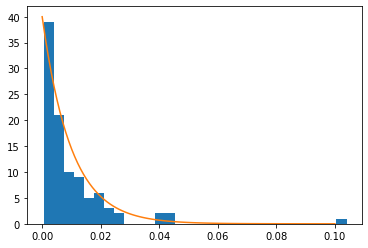

In [231]:
plt.hist(1 - fidelities, bins=30)
# fit exponential curve
X = np.linspace(0, .1, 100)
Y = np.exp(-1 / np.mean(1 - fidelities) * X)
plt.plot(X, Y * 40)